In [54]:
import torch
import tensorflow as tf
import pandas as pd
import jieba
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv('shijing.csv')

In [56]:
print(data.head())

  title chapter section                                            content
0    关雎      国风      周南  ["关关雎鸠，在河之洲。窈窕淑女，君子好逑。","参差荇菜，左右流之。窈窕淑女，寤寐求之。"...
1    葛覃      国风      周南  ["葛之覃兮，施于中谷，维叶萋萋。黄鸟于飞，集于灌木，其鸣喈喈。","葛之覃兮，施于中谷，维...
2    卷耳      国风      周南  ["采采卷耳，不盈顷筐。嗟我怀人，置彼周行。","陟彼崔嵬，我马虺隤。我姑酌彼金罍，维以不永...
3    樛木      国风      周南  ["南有樛木，葛藟累之。乐只君子，福履绥之。","南有樛木，葛藟荒之。乐只君子，福履将之。"...
4    螽斯      国风      周南  ["螽斯羽，诜诜兮。宜尔子孙，振振兮。","螽斯羽，薨薨兮。宜尔子孙。绳绳兮。","螽斯羽，...


In [57]:
data = data.dropna() # 删除缺失值
data["text_length"] = data["content"].apply(len) # 计算每条记录的文本长度
data = data[data["text_length"] > 10] # 删除文本长度小于等于10的记录

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.804 seconds.
Prefix dict has been built successfully.


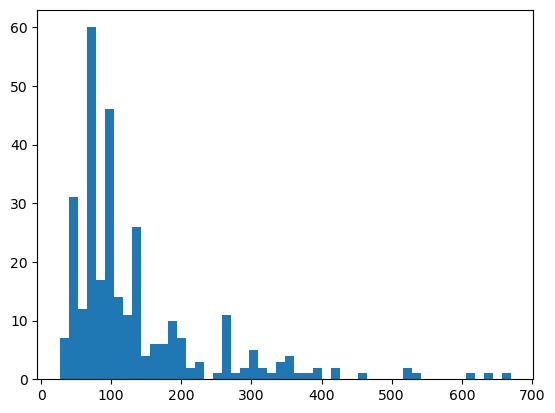

In [58]:
# 文本分词
data["text_cut"] = data["content"].apply(lambda x: " ".join(jieba.cut(x, cut_all=True)))

# 可视化呈现
plt.hist(data["text_length"], bins=50)
plt.show()